Leer Texto de imagenes

In [1]:
import easyocr
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt

Using CPU. Note: This module is much faster with a GPU.


CUDA disponible: False


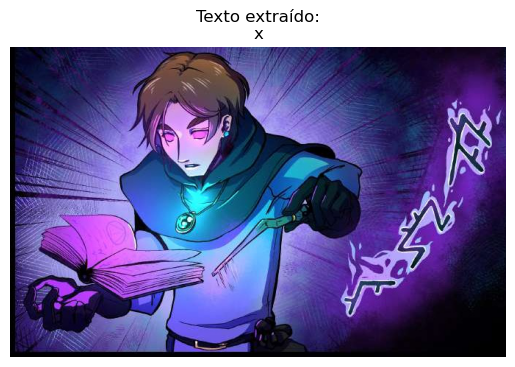

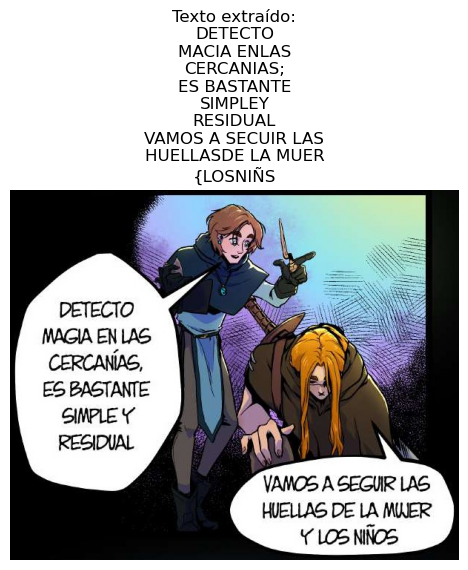

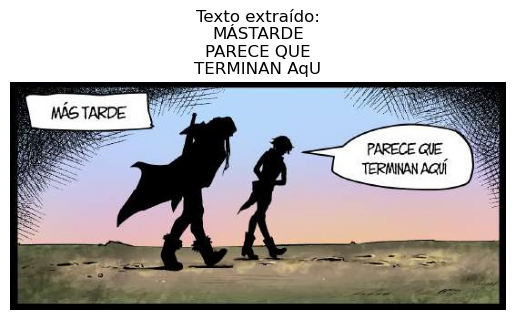

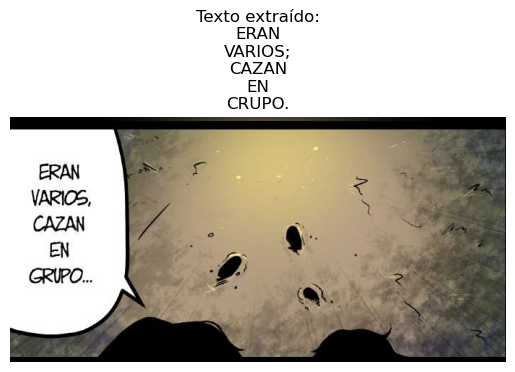

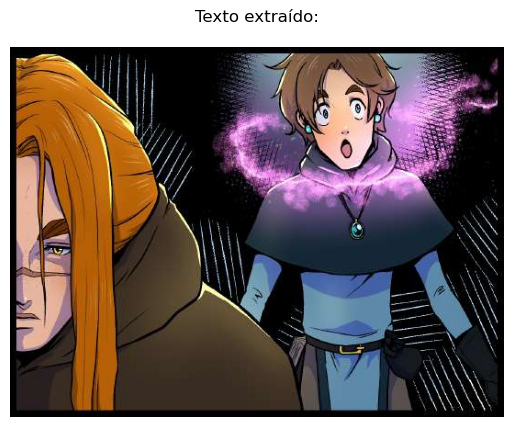

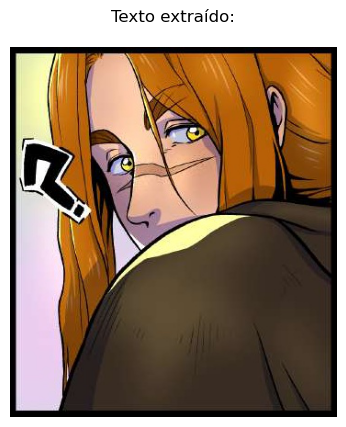

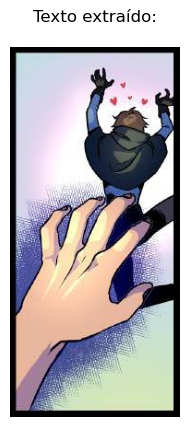

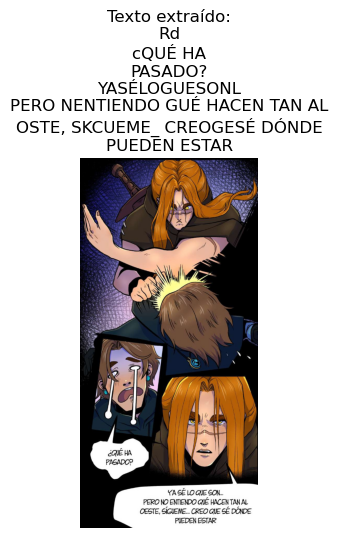

In [15]:
# Verificar si CUDA está disponible y configurar easyocr
use_cuda = torch.cuda.is_available()
print(f"CUDA disponible: {use_cuda}")

# Monkey patching para reemplazar Image.ANTIALIAS por Image.LANCZOS
if not hasattr(Image, 'ANTIALIAS'):
    Image.ANTIALIAS = Image.LANCZOS

# Inicializar el lector de easyocr con soporte CUDA si está disponible
reader = easyocr.Reader(['es'], gpu=use_cuda)

def extract_text_from_image(image_path):
    """Extrae texto de una imagen usando EasyOCR"""
    # Leer la imagen
    image = Image.open(image_path)
    # Extraer el texto de la imagen
    text = reader.readtext(image_path, detail=0)
    # Imprimir la imagen y el texto
    plt.imshow(image)
    plt.axis('off')
    plt.title('Texto extraído:\n' + '\n'.join(text))
    plt.show()
    return "\n".join(text)

def process_files_in_directory(directory):
    """Procesa todos los archivos en un directorio y extrae texto de ellos usando EasyOCR"""
    text_output = ""
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            text_output += extract_text_from_image(file_path) + "\n"
        else:
            print(f"El archivo {filename} no tiene el formato correcto")
    return text_output

# Directorio que contiene las imágenes y PDFs
input_directory = 'data/output/divide_images'

# Verificar si el directorio de entrada existe
if os.path.exists(input_directory) and os.path.isdir(input_directory):
    # Extraer texto de todos los archivos en el directorio
    extracted_text = process_files_in_directory(input_directory)
    
    # Crear el directorio de salida si no existe
    output_directory = 'data/output/output_text'
    os.makedirs(output_directory, exist_ok=True)
    
    # Guardar el texto extraído en un archivo de texto
    output_file_path = os.path.join(output_directory, 'output_text_easyocr.txt')
    with open(output_file_path, 'w', encoding='utf-8') as text_file:
        text_file.write(extracted_text)
else:
    print(f"El directorio {input_directory} no existe o no es un directorio válido.")